<a href="https://colab.research.google.com/github/mjiii25/22-1_DLAI/blob/main/team-project/modeling-dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# load data

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# data path
dpath = "/content/drive/MyDrive/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# h1n1 model.ver1

In [4]:
train_h1n1_ver1 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver1.csv')

In [5]:
print(train_h1n1_ver1.shape)
train_h1n1_ver1.head()

(24828, 24)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,age_group,race,sex,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,2.0,4,1,1,8,1,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,4.0,2,1,2,1,2,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1,1,2,9,2,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3.0,5.0,5,1,1,5,3,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,2.0,3,1,1,9,2,1.0,0.0,0


In [6]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver1.iloc[:,1:-1]
target = train_h1n1_ver1['h1n1_vaccine']

x_train_h1n1_ver1, x_valid_h1n1_ver1, y_train_h1n1_ver1, y_valid_h1n1_ver1 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### layer effect

#### layer 3개

In [7]:
## loss: 0.4390 - accuracy: 0.8098 - val_loss: 0.4555 - val_accuracy: 0.8004
## loss: 0.4379 - accuracy: 0.8089 - val_loss: 0.4540 - val_accuracy: 0.7996
## loss: 0.4369 - accuracy: 0.8092 - val_loss: 0.4529 - val_accuracy: 0.8039



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1 = keras.Sequential([
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1.compile(optimizer = "rmsprop",
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])



# fitting model

history_h1n1_ver1 = model_h1n1_ver1.fit(x_train_h1n1_ver1,
                                        y_train_h1n1_ver1,
                                        epochs = 20,
                                        batch_size = 512,
                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 4s 8ms/step - loss: 0.5015 - accuracy: 0.7863 - val_loss: 0.4885 - val_accuracy: 0.7865
Epoch 2/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4823 - accuracy: 0.7893 - val_loss: 0.4807 - val_accuracy: 0.7920
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4731 - accuracy: 0.7953 - val_loss: 0.4740 - val_accuracy: 0.7954
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4675 - accuracy: 0.7982 - val_loss: 0.4710 - val_accuracy: 0.7954
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4632 - accuracy: 0.7994 - val_loss: 0.4696 - val_accuracy: 0.7978
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4595 - accuracy: 0.8026 - val_loss: 0.4654 - val_accuracy: 0.8010
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.4571 - accuracy: 0.8033 - val_loss: 0.4635 - val_accuracy: 0.8019
Epoch 8/20
39/39 [==

#### layer 8개
- 레이어를 많이 쌓을수록 정확도가 증가함, 모델의 성능이 좋아짐

In [8]:
## loss: 0.4053 - accuracy: 0.8209 - val_loss: 0.4523 - val_accuracy: 0.7988
## loss: 0.3947 - accuracy: 0.8295 - val_loss: 0.4539 - val_accuracy: 0.8083
## loss: 0.3946 - accuracy: 0.8300 - val_loss: 0.4770 - val_accuracy: 0.8035



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1 = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1.compile(optimizer = "rmsprop",
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])



# fitting model

history_h1n1_ver1 = model_h1n1_ver1.fit(x_train_h1n1_ver1,
                                        y_train_h1n1_ver1,
                                        epochs = 20,
                                        batch_size = 512,
                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 9ms/step - loss: 0.5378 - accuracy: 0.7422 - val_loss: 0.4775 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4708 - accuracy: 0.7921 - val_loss: 0.4685 - val_accuracy: 0.7954
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4621 - accuracy: 0.7984 - val_loss: 0.4637 - val_accuracy: 0.8067
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4550 - accuracy: 0.8070 - val_loss: 0.5039 - val_accuracy: 0.7898
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4520 - accuracy: 0.8042 - val_loss: 0.4860 - val_accuracy: 0.7982
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4449 - accuracy: 0.8096 - val_loss: 0.5462 - val_accuracy: 0.7990
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4473 - accuracy: 0.8058 - val_loss: 0.4514 - val_accuracy: 0.8063
Epoch 8/20
39/39 [==

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [9]:
## loss: 0.4478 - accuracy: 0.8116 - val_loss: 0.4607 - val_accuracy: 0.8091
## loss: 0.4432 - accuracy: 0.8161 - val_loss: 0.4617 - val_accuracy: 0.8069
## loss: 0.4400 - accuracy: 0.8159 - val_loss: 0.4609 - val_accuracy: 0.8085



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_1 = model_h1n1_ver1_L1_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 10ms/step - loss: 1.8924 - accuracy: 0.7860 - val_loss: 1.3908 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 1.0784 - accuracy: 0.7859 - val_loss: 0.8207 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.6591 - accuracy: 0.7859 - val_loss: 0.5708 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5299 - accuracy: 0.7961 - val_loss: 0.5230 - val_accuracy: 0.7861
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5001 - accuracy: 0.8032 - val_loss: 0.5000 - val_accuracy: 0.7932
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4831 - accuracy: 0.8049 - val_loss: 0.4916 - val_accuracy: 0.8083
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4737 - accuracy: 0.8060 - val_loss: 0.4855 - val_accuracy: 0.8063
Epoch 8/20
39/39 [=

**layer 8개 + L1 regularization 2개**

In [10]:
## loss: 0.4559 - accuracy: 0.8156 - val_loss: 0.4747 - val_accuracy: 0.8095
## loss: 0.4521 - accuracy: 0.8152 - val_loss: 0.4667 - val_accuracy: 0.8115
## loss: 0.4504 - accuracy: 0.8168 - val_loss: 0.4705 - val_accuracy: 0.8111



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L1_2 = model_h1n1_ver1_L1_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 1.9932 - accuracy: 0.7813 - val_loss: 1.4663 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 1.1415 - accuracy: 0.7892 - val_loss: 0.8618 - val_accuracy: 0.7916
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.7059 - accuracy: 0.8011 - val_loss: 0.6247 - val_accuracy: 0.7920
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5711 - accuracy: 0.8017 - val_loss: 0.5498 - val_accuracy: 0.8073
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5319 - accuracy: 0.8042 - val_loss: 0.5226 - val_accuracy: 0.8069
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5078 - accuracy: 0.8063 - val_loss: 0.5098 - val_accuracy: 0.8083
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4947 - accuracy: 0.8049 - val_loss: 0.5053 - val_accuracy: 0.7926
Epoch 8/20
39/39 [=

**layer 8개 + L2 regularization 1개**

In [11]:
## loss: 0.4100 - accuracy: 0.8219 - val_loss: 0.4545 - val_accuracy: 0.7978
## loss: 0.4119 - accuracy: 0.8213 - val_loss: 0.4513 - val_accuracy: 0.8087
## loss: 0.4046 - accuracy: 0.8270 - val_loss: 0.4522 - val_accuracy: 0.8041




from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_1 = model_h1n1_ver1_L2_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 3s 19ms/step - loss: 0.6303 - accuracy: 0.7716 - val_loss: 0.5601 - val_accuracy: 0.7988
Epoch 2/20
39/39 [==============================] - 0s 12ms/step - loss: 0.5278 - accuracy: 0.7947 - val_loss: 0.5064 - val_accuracy: 0.7972
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4912 - accuracy: 0.8018 - val_loss: 0.5043 - val_accuracy: 0.7944
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4775 - accuracy: 0.8039 - val_loss: 0.4761 - val_accuracy: 0.8037
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4688 - accuracy: 0.8033 - val_loss: 0.4841 - val_accuracy: 0.7996
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4602 - accuracy: 0.8057 - val_loss: 0.4638 - val_accuracy: 0.8063
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4558 - accuracy: 0.8062 - val_loss: 0.4664 - val_accuracy: 0.8063
Epoch 8/20
39/39 [

**layer 8개 + L2 regularization 2개**

In [12]:
## loss: 0.4104 - accuracy: 0.8234 - val_loss: 0.4648 - val_accuracy: 0.8115
## loss: 0.4155 - accuracy: 0.8243 - val_loss: 0.4608 - val_accuracy: 0.8071
## loss: 0.4105 - accuracy: 0.8206 - val_loss: 0.4517 - val_accuracy: 0.8047



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L2_2 = model_h1n1_ver1_L2_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6370 - accuracy: 0.7859 - val_loss: 0.5758 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5439 - accuracy: 0.7948 - val_loss: 0.5670 - val_accuracy: 0.7483
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5058 - accuracy: 0.7993 - val_loss: 0.5072 - val_accuracy: 0.7964
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4843 - accuracy: 0.8038 - val_loss: 0.5230 - val_accuracy: 0.7684
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4731 - accuracy: 0.8060 - val_loss: 0.4824 - val_accuracy: 0.7920
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4633 - accuracy: 0.8072 - val_loss: 0.4781 - val_accuracy: 0.8071
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4600 - accuracy: 0.8070 - val_loss: 0.4732 - val_accuracy: 0.8039
Epoch 8/20
39/39 [=

**layer 8개 + L1&L2 regularization 1개**

In [13]:
## loss: 0.4500 - accuracy: 0.8158 - val_loss: 0.4707 - val_accuracy: 0.8127
## loss: 0.4509 - accuracy: 0.8160 - val_loss: 0.4650 - val_accuracy: 0.8103
## loss: 0.4507 - accuracy: 0.8181 - val_loss: 0.4669 - val_accuracy: 0.8101



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_L12 = model_h1n1_ver1_L12.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 2.1343 - accuracy: 0.7574 - val_loss: 1.5338 - val_accuracy: 0.7916
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 1.1853 - accuracy: 0.7929 - val_loss: 0.9038 - val_accuracy: 0.7926
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.7224 - accuracy: 0.7984 - val_loss: 0.6127 - val_accuracy: 0.7990
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5780 - accuracy: 0.7995 - val_loss: 0.5749 - val_accuracy: 0.7920
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5385 - accuracy: 0.8032 - val_loss: 0.5282 - val_accuracy: 0.8055
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5145 - accuracy: 0.8045 - val_loss: 0.5131 - val_accuracy: 0.8025
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5009 - accuracy: 0.8056 - val_loss: 0.5144 - val_accuracy: 0.7936
Epoch 8/20
39/39 [=

### visualize

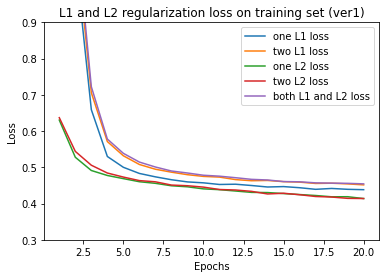

In [14]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history

loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["loss"]
loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["loss"]
loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["loss"]
loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["loss"]
loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_L1_1, label="one L1 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L1_2, label="two L1 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L2_1, label="one L2 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L2_2, label="two L2 loss")
plt.plot(epochs, loss_values_h1n1_ver1_L12, label="both L1 and L2 loss")


plt.title("L1 and L2 regularization loss on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

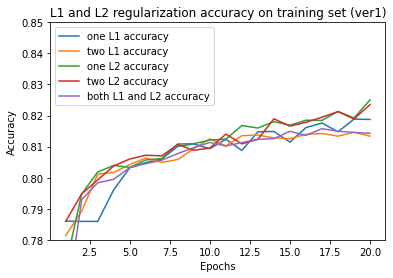

In [15]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["accuracy"]
acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["accuracy"]
acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["accuracy"]
acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["accuracy"]
acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_L1_1, label="one L1 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L1_2, label="two L1 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L2_1, label="one L2 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L2_2, label="two L2 accuracy")
plt.plot(epochs, acc_values_h1n1_ver1_L12, label="both L1 and L2 accuracy")

plt.title("L1 and L2 regularization accuracy on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

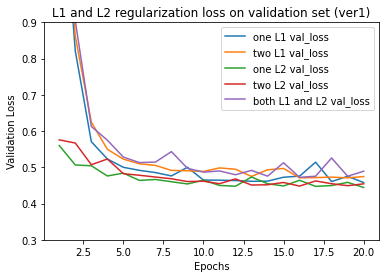

In [16]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history

val_loss_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_loss"]
val_loss_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_loss"]
val_loss_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_loss"]
val_loss_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_loss"]
val_loss_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_L1_1, label="one L1 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L1_2, label="two L1 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_1, label="one L2 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L2_2, label="two L2 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver1_L12, label="both L1 and L2 val_loss")


plt.title("L1 and L2 regularization loss on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

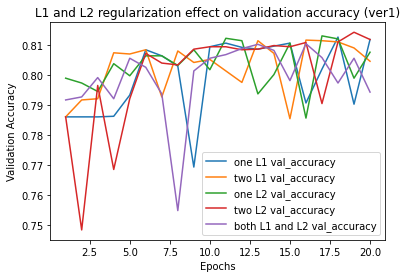

In [17]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_L1_1 = history_h1n1_ver1_L1_1.history
history_dict_h1n1_ver1_L1_2 = history_h1n1_ver1_L1_2.history
history_dict_h1n1_ver1_L2_1 = history_h1n1_ver1_L2_1.history
history_dict_h1n1_ver1_L2_2 = history_h1n1_ver1_L2_2.history
history_dict_h1n1_ver1_L12 = history_h1n1_ver1_L12.history


val_acc_values_h1n1_ver1_L1_1 = history_dict_h1n1_ver1_L1_1["val_accuracy"]
val_acc_values_h1n1_ver1_L1_2 = history_dict_h1n1_ver1_L1_2["val_accuracy"]
val_acc_values_h1n1_ver1_L2_1 = history_dict_h1n1_ver1_L2_1["val_accuracy"]
val_acc_values_h1n1_ver1_L2_2 = history_dict_h1n1_ver1_L2_2["val_accuracy"]
val_acc_values_h1n1_ver1_L12 = history_dict_h1n1_ver1_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_L1_1, label="one L1 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L1_2, label="two L1 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_1, label="one L2 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L2_2, label="two L2 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver1_L12, label="both L1 and L2 val_accuracy")


plt.title("L1 and L2 regularization effect on validation accuracy (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [18]:
## 0.005
## loss: 0.4081 - accuracy: 0.8263 - val_loss: 0.4562 - val_accuracy: 0.8125
## loss: 0.4136 - accuracy: 0.8236 - val_loss: 0.4530 - val_accuracy: 0.8107
## loss: 0.4016 - accuracy: 0.8263 - val_loss: 0.4890 - val_accuracy: 0.7708


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_one = model_h1n1_ver1_one.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 1.1158 - accuracy: 0.7859 - val_loss: 0.8551 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.7306 - accuracy: 0.7859 - val_loss: 0.6402 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5727 - accuracy: 0.7859 - val_loss: 0.5463 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5149 - accuracy: 0.7881 - val_loss: 0.5043 - val_accuracy: 0.7886
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4871 - accuracy: 0.8022 - val_loss: 0.5119 - val_accuracy: 0.7886
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4743 - accuracy: 0.8061 - val_loss: 0.4785 - val_accuracy: 0.8029
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4652 - accuracy: 0.8068 - val_loss: 0.4721 - val_accuracy: 0.8097
Epoch 8/20
39/39 [=

**0.002**

In [19]:
## 0.002
## loss: 0.4007 - accuracy: 0.8284 - val_loss: 0.4547 - val_accuracy: 0.8119
## loss: 0.4005 - accuracy: 0.8272 - val_loss: 0.4566 - val_accuracy: 0.8067
## loss: 0.4068 - accuracy: 0.8259 - val_loss: 0.4733 - val_accuracy: 0.8087



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_two = model_h1n1_ver1_two.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.7882 - accuracy: 0.7720 - val_loss: 0.6607 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.6095 - accuracy: 0.7933 - val_loss: 0.5670 - val_accuracy: 0.8033
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5354 - accuracy: 0.7986 - val_loss: 0.5199 - val_accuracy: 0.8023
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5031 - accuracy: 0.8013 - val_loss: 0.4940 - val_accuracy: 0.8055
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4832 - accuracy: 0.8047 - val_loss: 0.4843 - val_accuracy: 0.8045
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4727 - accuracy: 0.8045 - val_loss: 0.4803 - val_accuracy: 0.8008
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4641 - accuracy: 0.8063 - val_loss: 0.4758 - val_accuracy: 0.7972
Epoch 8/20
39/39 [=

**0.001(original)**

In [20]:
## 0.001
## loss: 0.4076 - accuracy: 0.8232 - val_loss: 0.4590 - val_accuracy: 0.8065
## loss: 0.3939 - accuracy: 0.8296 - val_loss: 0.4674 - val_accuracy: 0.8053
## loss: 0.4100 - accuracy: 0.8231 - val_loss: 0.4600 - val_accuracy: 0.8021



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_three = model_h1n1_ver1_three.fit(x_train_h1n1_ver1,
                                                     y_train_h1n1_ver1,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6579 - accuracy: 0.7727 - val_loss: 0.5771 - val_accuracy: 0.7890
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5516 - accuracy: 0.7940 - val_loss: 0.5277 - val_accuracy: 0.7946
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5080 - accuracy: 0.8009 - val_loss: 0.5226 - val_accuracy: 0.7936
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4884 - accuracy: 0.8046 - val_loss: 0.5061 - val_accuracy: 0.7962
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4749 - accuracy: 0.8051 - val_loss: 0.4778 - val_accuracy: 0.8031
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4642 - accuracy: 0.8053 - val_loss: 0.4810 - val_accuracy: 0.8085
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4593 - accuracy: 0.8085 - val_loss: 0.4903 - val_accuracy: 0.7998
Epoch 8/20
39/39 [=

**0.0005**

In [21]:
## 0.0005
## loss: 0.4115 - accuracy: 0.8228 - val_loss: 0.4528 - val_accuracy: 0.8065
## loss: 0.4084 - accuracy: 0.8241 - val_loss: 0.4575 - val_accuracy: 0.7992
## loss: 0.4106 - accuracy: 0.8241 - val_loss: 0.4538 - val_accuracy: 0.8117



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_four = model_h1n1_ver1_four.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.5836 - accuracy: 0.7829 - val_loss: 0.5455 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5156 - accuracy: 0.7932 - val_loss: 0.5114 - val_accuracy: 0.7984
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4942 - accuracy: 0.7980 - val_loss: 0.4888 - val_accuracy: 0.8045
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4787 - accuracy: 0.8006 - val_loss: 0.4849 - val_accuracy: 0.8061
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4696 - accuracy: 0.8054 - val_loss: 0.4735 - val_accuracy: 0.8073
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4622 - accuracy: 0.8069 - val_loss: 0.4734 - val_accuracy: 0.8012
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4577 - accuracy: 0.8076 - val_loss: 0.4702 - val_accuracy: 0.8075
Epoch 8/20
39/39 [=

**0.0001**

In [22]:
## 0.0001
## loss: 0.4093 - accuracy: 0.8249 - val_loss: 0.4621 - val_accuracy: 0.8113
## loss: 0.4050 - accuracy: 0.8230 - val_loss: 0.4580 - val_accuracy: 0.8095
## loss: 0.4038 - accuracy: 0.8252 - val_loss: 0.4700 - val_accuracy: 0.8067



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_five = model_h1n1_ver1_five.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.5283 - accuracy: 0.7719 - val_loss: 0.4872 - val_accuracy: 0.7902
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 0.7966 - val_loss: 0.4743 - val_accuracy: 0.8049
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4718 - accuracy: 0.7997 - val_loss: 0.4686 - val_accuracy: 0.8053
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4638 - accuracy: 0.8025 - val_loss: 0.4919 - val_accuracy: 0.7797
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4579 - accuracy: 0.8045 - val_loss: 0.4665 - val_accuracy: 0.8061
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4521 - accuracy: 0.8094 - val_loss: 0.4693 - val_accuracy: 0.8069
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4473 - accuracy: 0.8082 - val_loss: 0.4624 - val_accuracy: 0.8079
Epoch 8/20
39/39 [=

### visualize

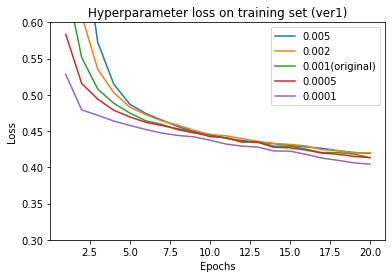

In [23]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_one = history_h1n1_ver1_one.history
history_dict_h1n1_ver1_two = history_h1n1_ver1_two.history
history_dict_h1n1_ver1_three = history_h1n1_ver1_three.history
history_dict_h1n1_ver1_four = history_h1n1_ver1_four.history
history_dict_h1n1_ver1_five = history_h1n1_ver1_five.history

loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["loss"]
loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["loss"]
loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["loss"]
loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["loss"]
loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter loss on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.6])
plt.legend()
plt.show()

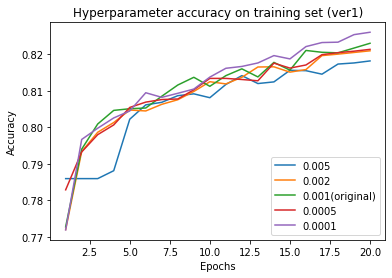

In [24]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["accuracy"]
acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["accuracy"]
acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["accuracy"]
acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["accuracy"]
acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver1_five, label="0.0001")

plt.title("Hyperparameter accuracy on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

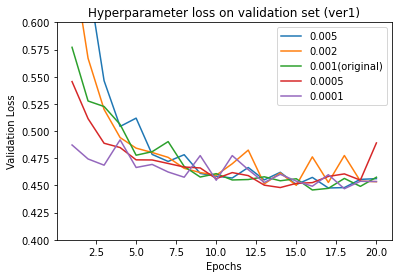

In [25]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_loss"]
val_loss_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_loss"]
val_loss_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_loss"]
val_loss_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_loss"]
val_loss_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter loss on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

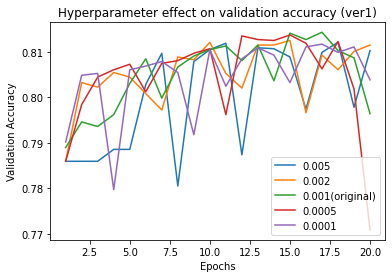

In [26]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_one = history_dict_h1n1_ver1_one["val_accuracy"]
val_acc_values_h1n1_ver1_two = history_dict_h1n1_ver1_two["val_accuracy"]
val_acc_values_h1n1_ver1_three = history_dict_h1n1_ver1_three["val_accuracy"]
val_acc_values_h1n1_ver1_four = history_dict_h1n1_ver1_four["val_accuracy"]
val_acc_values_h1n1_ver1_five = history_dict_h1n1_ver1_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver1_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver1_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver1_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver1_five, label="0.0001")


plt.title("Hyperparameter effect on validation accuracy (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [27]:
## one dropout
## loss: 0.4186 - accuracy: 0.8195 - val_loss: 0.4526 - val_accuracy: 0.8041
## loss: 0.4119 - accuracy: 0.8216 - val_loss: 0.4562 - val_accuracy: 0.7986
## loss: 0.4155 - accuracy: 0.8216 - val_loss: 0.4561 - val_accuracy: 0.8061


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_onedr = model_h1n1_ver1_onedr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 10ms/step - loss: 0.6666 - accuracy: 0.7731 - val_loss: 0.5927 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5626 - accuracy: 0.7873 - val_loss: 0.5678 - val_accuracy: 0.7819
Epoch 3/20
39/39 [==============================] - 0s 10ms/step - loss: 0.5195 - accuracy: 0.7936 - val_loss: 0.5137 - val_accuracy: 0.8010
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4961 - accuracy: 0.8036 - val_loss: 0.4897 - val_accuracy: 0.8091
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4803 - accuracy: 0.8035 - val_loss: 0.4780 - val_accuracy: 0.8012
Epoch 6/20
39/39 [==============================] - 0s 10ms/step - loss: 0.4724 - accuracy: 0.8068 - val_loss: 0.4745 - val_accuracy: 0.8033
Epoch 7/20
39/39 [==============================] - 0s 8ms/step - loss: 0.4636 - accuracy: 0.8060 - val_loss: 0.4675 - val_accuracy: 0.8079
Epoch 8/20
39/39 

**# dropout = 2**

In [28]:
## two dropout
## loss: 0.4225 - accuracy: 0.8194 - val_loss: 0.4630 - val_accuracy: 0.8023
## loss: 0.4112 - accuracy: 0.8211 - val_loss: 0.4725 - val_accuracy: 0.7793
## loss: 0.4187 - accuracy: 0.8181 - val_loss: 0.4520 - val_accuracy: 0.8109


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_twodr = model_h1n1_ver1_twodr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6749 - accuracy: 0.7711 - val_loss: 0.5786 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5665 - accuracy: 0.7859 - val_loss: 0.5425 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5282 - accuracy: 0.7861 - val_loss: 0.5092 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5061 - accuracy: 0.7924 - val_loss: 0.5073 - val_accuracy: 0.8037
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4888 - accuracy: 0.8037 - val_loss: 0.4835 - val_accuracy: 0.8059
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4785 - accuracy: 0.8021 - val_loss: 0.4790 - val_accuracy: 0.8041
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4705 - accuracy: 0.8046 - val_loss: 0.4878 - val_accuracy: 0.7938
Epoch 8/20
39/39 [=

**# dropout = 3**

In [29]:
## three dropout
## loss: 0.4308 - accuracy: 0.7859 - val_loss: 0.4954 - val_accuracy: 0.7859
## loss: 0.4264 - accuracy: 0.8120 - val_loss: 0.4659 - val_accuracy: 0.7861
## loss: 0.4252 - accuracy: 0.8103 - val_loss: 0.4626 - val_accuracy: 0.8131


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver1_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver1_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver1_threedr = model_h1n1_ver1_threedr.fit(x_train_h1n1_ver1,
                                                        y_train_h1n1_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.7055 - accuracy: 0.7758 - val_loss: 0.6350 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5977 - accuracy: 0.7859 - val_loss: 0.5497 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5553 - accuracy: 0.7859 - val_loss: 0.5376 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5243 - accuracy: 0.7859 - val_loss: 0.5230 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5065 - accuracy: 0.7859 - val_loss: 0.4980 - val_accuracy: 0.7859
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4921 - accuracy: 0.7859 - val_loss: 0.4877 - val_accuracy: 0.7859
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4833 - accuracy: 0.7862 - val_loss: 0.4765 - val_accuracy: 0.7859
Epoch 8/20
39/39 [=

### visualize

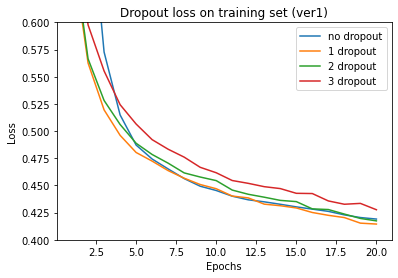

In [30]:
# Dropout effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver1_onedr = history_h1n1_ver1_onedr.history
history_dict_h1n1_ver1_twodr = history_h1n1_ver1_twodr.history
history_dict_h1n1_ver1_threedr = history_h1n1_ver1_threedr.history

loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["loss"]
loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["loss"]
loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout loss on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

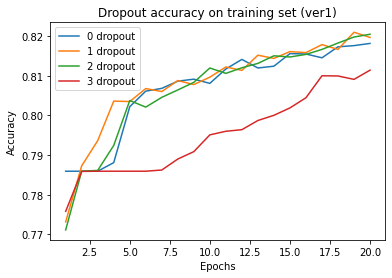

In [31]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["accuracy"]
acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["accuracy"]
acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver1_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout accuracy on training set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

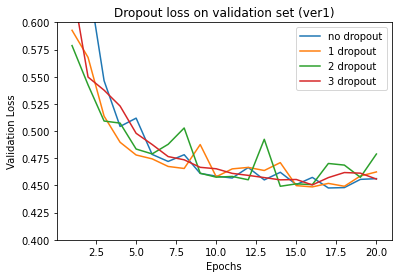

In [32]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_loss"]
val_loss_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_loss"]
val_loss_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver1_threedr, label="3 dropout")

plt.title("Dropout loss on validation set (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

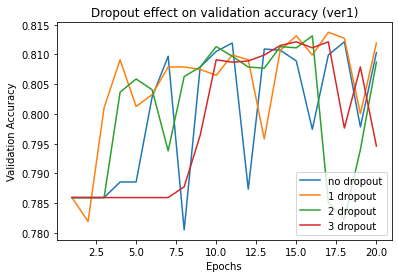

In [33]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver1_onedr = history_dict_h1n1_ver1_onedr["val_accuracy"]
val_acc_values_h1n1_ver1_twodr = history_dict_h1n1_ver1_twodr["val_accuracy"]
val_acc_values_h1n1_ver1_threedr = history_dict_h1n1_ver1_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver1_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver1_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver1_threedr, label="3 dropout")


plt.title("Dropout effect on validation accuracy (ver1)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# h1n1 model.ver2

In [34]:
train_h1n1_ver2 = pd.read_csv('/content/drive/MyDrive/22-1_DLAI_Team_Project/train_h1n1_ver2.csv')

In [35]:
print(train_h1n1_ver2.shape)
train_h1n1_ver2.head()

(24828, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,region_3,region_4,region_5,region_6,region_7,region_8,region_9,msa_1,msa_2,msa_3
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [39]:
train_h1n1_ver2.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'age_group', 'sex',
       'household_adults', 'household_children', 'h1n1_vaccine', 'race_1',
       'race_2', 'race_3', 'race_4', 'region_0', 'region_1', 'region_2',
       'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
       'region_9', 'msa_1', 'msa_2', 'msa_3'],
      dtype='object')

In [40]:
## split feature and target, train set and validation set

from sklearn.model_selection import train_test_split

feature = train_h1n1_ver2.iloc[:,1:-1]
target = train_h1n1_ver2['h1n1_vaccine']

x_train_h1n1_ver2, x_valid_h1n1_ver2, y_train_h1n1_ver2, y_valid_h1n1_ver2 = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                              stratify=target,  random_state=1234) 

### layer effect

#### layer 3개

In [44]:
## loss: 0.4393 - accuracy: 0.8088 - val_loss: 0.4541 - val_accuracy: 0.8069
## loss: 0.4381 - accuracy: 0.8083 - val_loss: 0.4516 - val_accuracy: 0.8059
## loss: 0.4385 - accuracy: 0.8092 - val_loss: 0.4567 - val_accuracy: 0.8041



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2 = keras.Sequential([
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2.compile(optimizer = "rmsprop",
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])



# fitting model

history_h1n1_ver2 = model_h1n1_ver2.fit(x_train_h1n1_ver1,
                                        y_train_h1n1_ver1,
                                        epochs = 20,
                                        batch_size = 512,
                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 12ms/step - loss: 0.7572 - accuracy: 0.5631 - val_loss: 0.5705 - val_accuracy: 0.7702
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5477 - accuracy: 0.7786 - val_loss: 0.5282 - val_accuracy: 0.7805
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5138 - accuracy: 0.7831 - val_loss: 0.5063 - val_accuracy: 0.7825
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4954 - accuracy: 0.7841 - val_loss: 0.4934 - val_accuracy: 0.7833
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4827 - accuracy: 0.7860 - val_loss: 0.4848 - val_accuracy: 0.7872
Epoch 6/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4734 - accuracy: 0.7884 - val_loss: 0.4775 - val_accuracy: 0.7904
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4659 - accuracy: 0.7929 - val_loss: 0.4741 - val_accuracy: 0.7936
Epoch 8/20
39/39 [=

#### layer 8개
- 레이어를 많이 쌓을수록 정확도가 증가함, 모델의 성능이 좋아짐

In [47]:
## loss: 0.3926 - accuracy: 0.8266 - val_loss: 0.4650 - val_accuracy: 0.7851
## loss: 0.3928 - accuracy: 0.8314 - val_loss: 0.4891 - val_accuracy: 0.8081
## loss: 0.3869 - accuracy: 0.8273 - val_loss: 0.4611 - val_accuracy: 0.8099



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2 = keras.Sequential([
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(256, activation = "relu"),
                                    layers.Dense(128, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(64, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(16, activation = "relu"),
                                    layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2.compile(optimizer = "rmsprop",
                        loss = "binary_crossentropy",
                        metrics = ["accuracy"])



# fitting model

history_h1n1_ver2 = model_h1n1_ver2.fit(x_train_h1n1_ver1,
                                        y_train_h1n1_ver1,
                                        epochs = 20,
                                        batch_size = 512,
                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 15ms/step - loss: 0.5111 - accuracy: 0.7859 - val_loss: 0.4895 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4725 - accuracy: 0.7859 - val_loss: 0.4676 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4633 - accuracy: 0.7891 - val_loss: 0.4845 - val_accuracy: 0.7954
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4595 - accuracy: 0.8021 - val_loss: 0.4628 - val_accuracy: 0.7964
Epoch 5/20
39/39 [==============================] - 0s 8ms/step - loss: 0.4519 - accuracy: 0.8046 - val_loss: 0.4619 - val_accuracy: 0.7952
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4466 - accuracy: 0.8052 - val_loss: 0.4665 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4421 - accuracy: 0.8060 - val_loss: 0.4569 - val_accuracy: 0.8014
Epoch 8/20
39/39 [=

## **L1, L2 regularization effect**

**layer 8개 + L1 regularization 1개**

In [50]:
## loss: 0.4418 - accuracy: 0.8158 - val_loss: 0.4738 - val_accuracy: 0.7968
## loss: 0.4452 - accuracy: 0.8152 - val_loss: 0.5090 - val_accuracy: 0.8006
## loss: 0.4385 - accuracy: 0.8161 - val_loss: 0.4581 - val_accuracy: 0.8127



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_1 = model_h1n1_ver2_L1_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 16ms/step - loss: 1.9520 - accuracy: 0.7709 - val_loss: 1.4637 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 8ms/step - loss: 1.1367 - accuracy: 0.7930 - val_loss: 0.8562 - val_accuracy: 0.7904
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.6900 - accuracy: 0.7981 - val_loss: 0.5997 - val_accuracy: 0.7956
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5427 - accuracy: 0.8016 - val_loss: 0.5285 - val_accuracy: 0.8037
Epoch 5/20
39/39 [==============================] - 0s 10ms/step - loss: 0.5049 - accuracy: 0.8047 - val_loss: 0.5131 - val_accuracy: 0.8029
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4860 - accuracy: 0.8036 - val_loss: 0.4891 - val_accuracy: 0.8069
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4765 - accuracy: 0.8071 - val_loss: 0.4907 - val_accuracy: 0.8027
Epoch 8/20
39/39 [

**layer 8개 + L1 regularization 2개**

In [53]:
## loss: 0.4524 - accuracy: 0.8157 - val_loss: 0.4727 - val_accuracy: 0.8073
## loss: 0.4516 - accuracy: 0.8180 - val_loss: 0.4774 - val_accuracy: 0.8083
## loss: 0.4530 - accuracy: 0.8145 - val_loss: 0.4723 - val_accuracy: 0.8041



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L1_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L1_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L1_2 = model_h1n1_ver2_L1_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 15ms/step - loss: 2.0372 - accuracy: 0.7708 - val_loss: 1.5057 - val_accuracy: 0.7878
Epoch 2/20
39/39 [==============================] - 0s 8ms/step - loss: 1.1827 - accuracy: 0.7926 - val_loss: 0.9196 - val_accuracy: 0.7789
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.7335 - accuracy: 0.7975 - val_loss: 0.6238 - val_accuracy: 0.8017
Epoch 4/20
39/39 [==============================] - 0s 8ms/step - loss: 0.5823 - accuracy: 0.7997 - val_loss: 0.5551 - val_accuracy: 0.8019
Epoch 5/20
39/39 [==============================] - 0s 10ms/step - loss: 0.5375 - accuracy: 0.8033 - val_loss: 0.5254 - val_accuracy: 0.8019
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5137 - accuracy: 0.8034 - val_loss: 0.5087 - val_accuracy: 0.8075
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4973 - accuracy: 0.8058 - val_loss: 0.4991 - val_accuracy: 0.8039
Epoch 8/20
39/39 [

**layer 8개 + L2 regularization 1개**

In [56]:
## loss: 0.4067 - accuracy: 0.8243 - val_loss: 0.4496 - val_accuracy: 0.8103
## loss: 0.4122 - accuracy: 0.8193 - val_loss: 0.4460 - val_accuracy: 0.8145
## loss: 0.4123 - accuracy: 0.8236 - val_loss: 0.4481 - val_accuracy: 0.8077




from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_1 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_1.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_1 = model_h1n1_ver2_L2_1.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 17ms/step - loss: 0.6218 - accuracy: 0.7821 - val_loss: 0.5648 - val_accuracy: 0.7970
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5258 - accuracy: 0.7996 - val_loss: 0.5698 - val_accuracy: 0.7906
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4975 - accuracy: 0.7988 - val_loss: 0.4876 - val_accuracy: 0.8023
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4783 - accuracy: 0.8033 - val_loss: 0.4777 - val_accuracy: 0.8055
Epoch 5/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4686 - accuracy: 0.8049 - val_loss: 0.4782 - val_accuracy: 0.8027
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4605 - accuracy: 0.8055 - val_loss: 0.4658 - val_accuracy: 0.8059
Epoch 7/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4552 - accuracy: 0.8050 - val_loss: 0.4605 - val_accuracy: 0.8059
Epoch 8/20
39/39 [=

**layer 8개 + L2 regularization 2개**

In [59]:
## loss: 0.4108 - accuracy: 0.8239 - val_loss: 0.4510 - val_accuracy: 0.8129
## loss: 0.4116 - accuracy: 0.8226 - val_loss: 0.4501 - val_accuracy: 0.8081
## loss: 0.4162 - accuracy: 0.8200 - val_loss: 0.4523 - val_accuracy: 0.7992



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L2_2 = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L2_2.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L2_2 = model_h1n1_ver2_L2_2.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 16ms/step - loss: 0.6560 - accuracy: 0.7708 - val_loss: 0.5709 - val_accuracy: 0.7948
Epoch 2/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5435 - accuracy: 0.7962 - val_loss: 0.5251 - val_accuracy: 0.7984
Epoch 3/20
39/39 [==============================] - 0s 9ms/step - loss: 0.5038 - accuracy: 0.8005 - val_loss: 0.5004 - val_accuracy: 0.8047
Epoch 4/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4823 - accuracy: 0.8007 - val_loss: 0.4813 - val_accuracy: 0.8037
Epoch 5/20
39/39 [==============================] - 0s 8ms/step - loss: 0.4703 - accuracy: 0.8032 - val_loss: 0.4866 - val_accuracy: 0.8061
Epoch 6/20
39/39 [==============================] - 0s 9ms/step - loss: 0.4628 - accuracy: 0.8076 - val_loss: 0.5100 - val_accuracy: 0.7680
Epoch 7/20
39/39 [==============================] - 0s 8ms/step - loss: 0.4568 - accuracy: 0.8079 - val_loss: 0.5015 - val_accuracy: 0.8006
Epoch 8/20
39/39 [=

**layer 8개 + L1&L2 regularization 1개**

In [60]:
## loss: 0.4500 - accuracy: 0.8158 - val_loss: 0.4707 - val_accuracy: 0.8127
## loss: 0.4509 - accuracy: 0.8160 - val_loss: 0.4650 - val_accuracy: 0.8103
## loss: 0.4507 - accuracy: 0.8181 - val_loss: 0.4669 - val_accuracy: 0.8101



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_L12 = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.001)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_L12.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_L12 = model_h1n1_ver2_L12.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 12ms/step - loss: 2.1386 - accuracy: 0.7767 - val_loss: 1.5834 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 1.2158 - accuracy: 0.7900 - val_loss: 0.9105 - val_accuracy: 0.7922
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.7371 - accuracy: 0.7975 - val_loss: 0.6219 - val_accuracy: 0.8037
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5802 - accuracy: 0.8006 - val_loss: 0.5780 - val_accuracy: 0.7896
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5321 - accuracy: 0.8051 - val_loss: 0.5312 - val_accuracy: 0.8053
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5066 - accuracy: 0.8041 - val_loss: 0.5096 - val_accuracy: 0.8071
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4921 - accuracy: 0.8082 - val_loss: 0.5076 - val_accuracy: 0.7835
Epoch 8/20
39/39 [=

### visualize

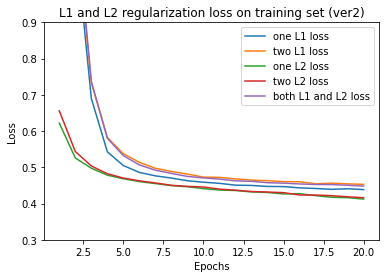

In [85]:
# L1, L2 regularization effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_L1_1 = history_h1n1_ver2_L1_1.history
history_dict_h1n1_ver2_L1_2 = history_h1n1_ver2_L1_2.history
history_dict_h1n1_ver2_L2_1 = history_h1n1_ver2_L2_1.history
history_dict_h1n1_ver2_L2_2 = history_h1n1_ver2_L2_2.history
history_dict_h1n1_ver2_L12 = history_h1n1_ver2_L12.history

loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["loss"]
loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["loss"]
loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["loss"]
loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["loss"]
loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_L1_1, label="one L1 loss")
plt.plot(epochs, loss_values_h1n1_ver2_L1_2, label="two L1 loss")
plt.plot(epochs, loss_values_h1n1_ver2_L2_1, label="one L2 loss")
plt.plot(epochs, loss_values_h1n1_ver2_L2_2, label="two L2 loss")
plt.plot(epochs, loss_values_h1n1_ver2_L12, label="both L1 and L2 loss")


plt.title("L1 and L2 regularization loss on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

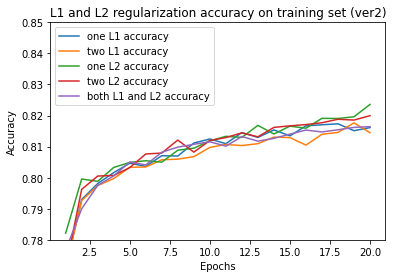

In [86]:
# L1, L2 regularization effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["accuracy"]
acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["accuracy"]
acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["accuracy"]
acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["accuracy"]
acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_L1_1, label="one L1 accuracy")
plt.plot(epochs, acc_values_h1n1_ver2_L1_2, label="two L1 accuracy")
plt.plot(epochs, acc_values_h1n1_ver2_L2_1, label="one L2 accuracy")
plt.plot(epochs, acc_values_h1n1_ver2_L2_2, label="two L2 accuracy")
plt.plot(epochs, acc_values_h1n1_ver2_L12, label="both L1 and L2 accuracy")

plt.title("L1 and L2 regularization accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

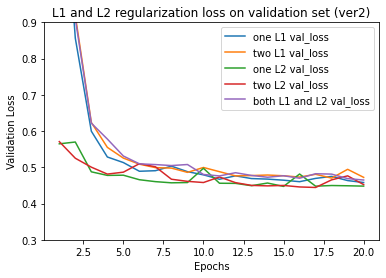

In [87]:
# L1, L2 regularization effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_loss"]
val_loss_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_loss"]
val_loss_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_loss"]
val_loss_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_loss"]
val_loss_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_L1_1, label="one L1 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver2_L1_2, label="two L1 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_1, label="one L2 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver2_L2_2, label="two L2 val_loss")
plt.plot(epochs, val_loss_values_h1n1_ver2_L12, label="both L1 and L2 val_loss")


plt.title("L1 and L2 regularization loss on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.3,0.9])
plt.legend()
plt.show()

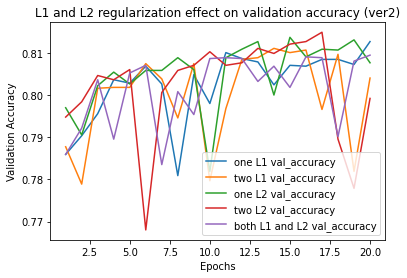

In [88]:
# L1, L2 regularization effect on validation accuracy


import matplotlib.pyplot as plt


val_acc_values_h1n1_ver2_L1_1 = history_dict_h1n1_ver2_L1_1["val_accuracy"]
val_acc_values_h1n1_ver2_L1_2 = history_dict_h1n1_ver2_L1_2["val_accuracy"]
val_acc_values_h1n1_ver2_L2_1 = history_dict_h1n1_ver2_L2_1["val_accuracy"]
val_acc_values_h1n1_ver2_L2_2 = history_dict_h1n1_ver2_L2_2["val_accuracy"]
val_acc_values_h1n1_ver2_L12 = history_dict_h1n1_ver2_L12["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_L1_1) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_L1_1, label="one L1 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver2_L1_2, label="two L1 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_1, label="one L2 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver2_L2_2, label="two L2 val_accuracy")
plt.plot(epochs, val_acc_values_h1n1_ver2_L12, label="both L1 and L2 val_accuracy")


plt.title("L1 and L2 regularization effect on validation accuracy (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Hyperparameter effect**

**0.005**

In [64]:
## 0.005
## loss: 0.4081 - accuracy: 0.8263 - val_loss: 0.4562 - val_accuracy: 0.8125
## loss: 0.4136 - accuracy: 0.8236 - val_loss: 0.4530 - val_accuracy: 0.8107
## loss: 0.4016 - accuracy: 0.8263 - val_loss: 0.4890 - val_accuracy: 0.7708


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_one = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.005)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_one.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_one = model_h1n1_ver2_one.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 1.1221 - accuracy: 0.7781 - val_loss: 0.9229 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 7ms/step - loss: 0.7417 - accuracy: 0.7914 - val_loss: 0.6507 - val_accuracy: 0.7904
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5840 - accuracy: 0.7978 - val_loss: 0.5505 - val_accuracy: 0.7954
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5225 - accuracy: 0.7989 - val_loss: 0.5305 - val_accuracy: 0.8043
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4918 - accuracy: 0.8025 - val_loss: 0.4953 - val_accuracy: 0.8027
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4761 - accuracy: 0.8069 - val_loss: 0.4954 - val_accuracy: 0.7819
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4646 - accuracy: 0.8073 - val_loss: 0.4973 - val_accuracy: 0.7700
Epoch 8/20
39/39 [=

**0.002**

In [65]:
## 0.002
## loss: 0.4007 - accuracy: 0.8284 - val_loss: 0.4547 - val_accuracy: 0.8119
## loss: 0.4005 - accuracy: 0.8272 - val_loss: 0.4566 - val_accuracy: 0.8067
## loss: 0.4068 - accuracy: 0.8259 - val_loss: 0.4733 - val_accuracy: 0.8087



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_two = keras.Sequential([
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(256, activation = "relu"),
                                        layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(64, activation = "relu"),
                                        layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.002)),
                                        layers.Dense(16, activation = "relu"),
                                        layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_two.compile(optimizer = "rmsprop",
                            loss = "binary_crossentropy",
                            metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_two = model_h1n1_ver2_two.fit(x_train_h1n1_ver1,
                                                y_train_h1n1_ver1,
                                                epochs = 20,
                                                batch_size = 512,
                                                validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.7694 - accuracy: 0.7758 - val_loss: 0.6495 - val_accuracy: 0.7861
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.6003 - accuracy: 0.7933 - val_loss: 0.5545 - val_accuracy: 0.8023
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5253 - accuracy: 0.7997 - val_loss: 0.5239 - val_accuracy: 0.7958
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4915 - accuracy: 0.8031 - val_loss: 0.4865 - val_accuracy: 0.8043
Epoch 5/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4749 - accuracy: 0.8049 - val_loss: 0.4758 - val_accuracy: 0.8045
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4636 - accuracy: 0.8069 - val_loss: 0.4838 - val_accuracy: 0.8059
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4562 - accuracy: 0.8084 - val_loss: 0.4659 - val_accuracy: 0.8103
Epoch 8/20
39/39 [=

**0.001(original)**

In [66]:
## 0.001
## loss: 0.4076 - accuracy: 0.8232 - val_loss: 0.4590 - val_accuracy: 0.8065
## loss: 0.3939 - accuracy: 0.8296 - val_loss: 0.4674 - val_accuracy: 0.8053
## loss: 0.4100 - accuracy: 0.8231 - val_loss: 0.4600 - val_accuracy: 0.8021



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_three = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_three.compile(optimizer = "rmsprop",
                               loss = "binary_crossentropy",
                               metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_three = model_h1n1_ver2_three.fit(x_train_h1n1_ver1,
                                                     y_train_h1n1_ver1,
                                                     epochs = 20,
                                                     batch_size = 512,
                                                     validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 11ms/step - loss: 0.6513 - accuracy: 0.7731 - val_loss: 0.5969 - val_accuracy: 0.7841
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5549 - accuracy: 0.7949 - val_loss: 0.5309 - val_accuracy: 0.8014
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5130 - accuracy: 0.8003 - val_loss: 0.5119 - val_accuracy: 0.8019
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4911 - accuracy: 0.8005 - val_loss: 0.4901 - val_accuracy: 0.8019
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4751 - accuracy: 0.8051 - val_loss: 0.4892 - val_accuracy: 0.7988
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4675 - accuracy: 0.8058 - val_loss: 0.4886 - val_accuracy: 0.8061
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4597 - accuracy: 0.8096 - val_loss: 0.4927 - val_accuracy: 0.8069
Epoch 8/20
39/39 [=

**0.0005**

In [67]:
## 0.0005
## loss: 0.4115 - accuracy: 0.8228 - val_loss: 0.4528 - val_accuracy: 0.8065
## loss: 0.4084 - accuracy: 0.8241 - val_loss: 0.4575 - val_accuracy: 0.7992
## loss: 0.4106 - accuracy: 0.8241 - val_loss: 0.4538 - val_accuracy: 0.8117



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_four = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0005)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_four.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_four = model_h1n1_ver2_four.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.5841 - accuracy: 0.7739 - val_loss: 0.5286 - val_accuracy: 0.7936
Epoch 2/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5132 - accuracy: 0.7938 - val_loss: 0.4998 - val_accuracy: 0.8008
Epoch 3/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4914 - accuracy: 0.8002 - val_loss: 0.5218 - val_accuracy: 0.7761
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4756 - accuracy: 0.8034 - val_loss: 0.4939 - val_accuracy: 0.8017
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4689 - accuracy: 0.8055 - val_loss: 0.4848 - val_accuracy: 0.8049
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4608 - accuracy: 0.8068 - val_loss: 0.4660 - val_accuracy: 0.8075
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4561 - accuracy: 0.8088 - val_loss: 0.4660 - val_accuracy: 0.8017
Epoch 8/20
39/39 [=

**0.0001**

In [68]:
## 0.0001
## loss: 0.4093 - accuracy: 0.8249 - val_loss: 0.4621 - val_accuracy: 0.8113
## loss: 0.4050 - accuracy: 0.8230 - val_loss: 0.4580 - val_accuracy: 0.8095
## loss: 0.4038 - accuracy: 0.8252 - val_loss: 0.4700 - val_accuracy: 0.8067



from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_five = keras.Sequential([
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(256, activation = "relu"),
                                         layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(64, activation = "relu"),
                                         layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.0001)),
                                         layers.Dense(16, activation = "relu"),
                                         layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_five.compile(optimizer = "rmsprop",
                             loss = "binary_crossentropy",
                             metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_five = model_h1n1_ver2_five.fit(x_train_h1n1_ver1,
                                                  y_train_h1n1_ver1,
                                                  epochs = 20,
                                                  batch_size = 512,
                                                  validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 2s 11ms/step - loss: 0.5211 - accuracy: 0.7857 - val_loss: 0.4978 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4834 - accuracy: 0.7859 - val_loss: 0.4775 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4719 - accuracy: 0.7888 - val_loss: 0.4723 - val_accuracy: 0.8017
Epoch 4/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4636 - accuracy: 0.8022 - val_loss: 0.4671 - val_accuracy: 0.8014
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4582 - accuracy: 0.8050 - val_loss: 0.4607 - val_accuracy: 0.8065
Epoch 6/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4497 - accuracy: 0.8085 - val_loss: 0.4660 - val_accuracy: 0.8008
Epoch 7/20
39/39 [==============================] - 0s 5ms/step - loss: 0.4493 - accuracy: 0.8081 - val_loss: 0.4569 - val_accuracy: 0.8087
Epoch 8/20
39/39 [=

### visualize

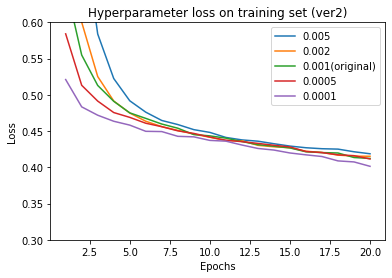

In [69]:
# Hyperparameter effect on training loss


import matplotlib.pyplot as plt

history_dict_h1n1_ver2_one = history_h1n1_ver2_one.history
history_dict_h1n1_ver2_two = history_h1n1_ver2_two.history
history_dict_h1n1_ver2_three = history_h1n1_ver2_three.history
history_dict_h1n1_ver2_four = history_h1n1_ver2_four.history
history_dict_h1n1_ver2_five = history_h1n1_ver2_five.history

loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["loss"]
loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["loss"]
loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["loss"]
loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["loss"]
loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["loss"]


epochs = range(1, len(loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter loss on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.3,0.6])
plt.legend()
plt.show()

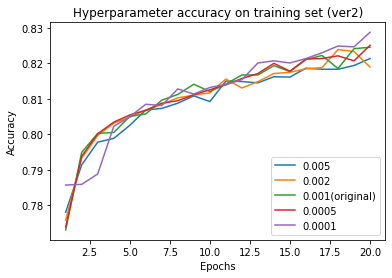

In [70]:
# Hyperparameter effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["accuracy"]
acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["accuracy"]
acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["accuracy"]
acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["accuracy"]
acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, acc_values_h1n1_ver2_five, label="0.0001")

plt.title("Hyperparameter accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

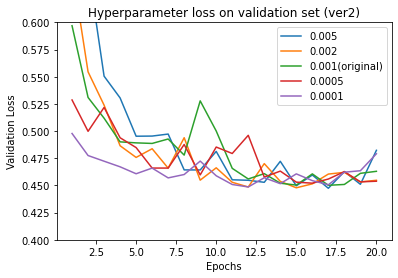

In [71]:
# Hyperparameter effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_loss"]
val_loss_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_loss"]
val_loss_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_loss"]
val_loss_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_loss"]
val_loss_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_loss_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_loss_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_loss_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_loss_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter loss on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

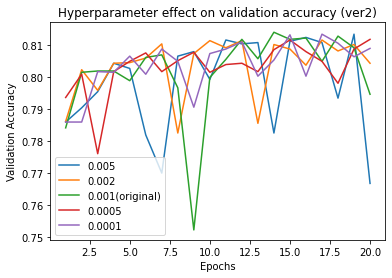

In [72]:
# Hyperparameter effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_one = history_dict_h1n1_ver2_one["val_accuracy"]
val_acc_values_h1n1_ver2_two = history_dict_h1n1_ver2_two["val_accuracy"]
val_acc_values_h1n1_ver2_three = history_dict_h1n1_ver2_three["val_accuracy"]
val_acc_values_h1n1_ver2_four = history_dict_h1n1_ver2_four["val_accuracy"]
val_acc_values_h1n1_ver2_five = history_dict_h1n1_ver2_five["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_one) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="0.005")
plt.plot(epochs, val_acc_values_h1n1_ver2_two, label="0.002")
plt.plot(epochs, val_acc_values_h1n1_ver2_three, label="0.001(original)")
plt.plot(epochs, val_acc_values_h1n1_ver2_four, label="0.0005")
plt.plot(epochs, val_acc_values_h1n1_ver2_five, label="0.0001")


plt.title("Hyperparameter effect on validation accuracy (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

## **Dropout effect**

**# dropout = 1**

In [73]:
## one dropout
## loss: 0.4186 - accuracy: 0.8195 - val_loss: 0.4526 - val_accuracy: 0.8041
## loss: 0.4119 - accuracy: 0.8216 - val_loss: 0.4562 - val_accuracy: 0.7986
## loss: 0.4155 - accuracy: 0.8216 - val_loss: 0.4561 - val_accuracy: 0.8061


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_onedr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_onedr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_onedr = model_h1n1_ver2_onedr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6509 - accuracy: 0.7757 - val_loss: 0.5753 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5504 - accuracy: 0.7860 - val_loss: 0.5355 - val_accuracy: 0.7886
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5109 - accuracy: 0.7925 - val_loss: 0.4996 - val_accuracy: 0.8045
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4945 - accuracy: 0.7988 - val_loss: 0.4903 - val_accuracy: 0.8027
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4785 - accuracy: 0.8042 - val_loss: 0.4756 - val_accuracy: 0.8037
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4699 - accuracy: 0.8044 - val_loss: 0.4740 - val_accuracy: 0.8021
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4633 - accuracy: 0.8050 - val_loss: 0.4661 - val_accuracy: 0.8077
Epoch 8/20
39/39 [=

**# dropout = 2**

In [74]:
## two dropout
## loss: 0.4225 - accuracy: 0.8194 - val_loss: 0.4630 - val_accuracy: 0.8023
## loss: 0.4112 - accuracy: 0.8211 - val_loss: 0.4725 - val_accuracy: 0.7793
## loss: 0.4187 - accuracy: 0.8181 - val_loss: 0.4520 - val_accuracy: 0.8109


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_twodr = keras.Sequential([
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(256, activation = "relu"),
                                          layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(64, activation = "relu"),
                                          layers.Dropout(0.5),
                                          layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                          layers.Dense(16, activation = "relu"),
                                          layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_twodr.compile(optimizer = "rmsprop",
                              loss = "binary_crossentropy",
                              metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_twodr = model_h1n1_ver2_twodr.fit(x_train_h1n1_ver1,
                                                    y_train_h1n1_ver1,
                                                    epochs = 20,
                                                    batch_size = 512,
                                                    validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.6688 - accuracy: 0.7693 - val_loss: 0.5787 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5628 - accuracy: 0.7866 - val_loss: 0.5480 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 5ms/step - loss: 0.5246 - accuracy: 0.7910 - val_loss: 0.5126 - val_accuracy: 0.8023
Epoch 4/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5028 - accuracy: 0.7958 - val_loss: 0.4934 - val_accuracy: 0.8051
Epoch 5/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4889 - accuracy: 0.7978 - val_loss: 0.4953 - val_accuracy: 0.7982
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4771 - accuracy: 0.8003 - val_loss: 0.5097 - val_accuracy: 0.7797
Epoch 7/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4716 - accuracy: 0.8009 - val_loss: 0.4777 - val_accuracy: 0.8075
Epoch 8/20
39/39 [=

**# dropout = 3**

In [75]:
## three dropout
## loss: 0.4308 - accuracy: 0.7859 - val_loss: 0.4954 - val_accuracy: 0.7859
## loss: 0.4264 - accuracy: 0.8120 - val_loss: 0.4659 - val_accuracy: 0.7861
## loss: 0.4252 - accuracy: 0.8103 - val_loss: 0.4626 - val_accuracy: 0.8131


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers


# building model

model_h1n1_ver2_threedr = keras.Sequential([
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(256, activation = "relu"),
                                            layers.Dense(128, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(64, activation = "relu"),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu", kernel_regularizer = regularizers.l2(0.001)),
                                            layers.Dropout(0.5),
                                            layers.Dense(16, activation = "relu"),
                                            layers.Dense(1, activation = "sigmoid")
])


# compiling model

model_h1n1_ver2_threedr.compile(optimizer = "rmsprop",
                                loss = "binary_crossentropy",
                                metrics = ["accuracy"])



# fitting model

history_h1n1_ver2_threedr = model_h1n1_ver2_threedr.fit(x_train_h1n1_ver1,
                                                        y_train_h1n1_ver1,
                                                        epochs = 20,
                                                        batch_size = 512,
                                                        validation_data = (x_valid_h1n1_ver1, y_valid_h1n1_ver1))


Epoch 1/20
39/39 [==============================] - 1s 10ms/step - loss: 0.6933 - accuracy: 0.7770 - val_loss: 0.6094 - val_accuracy: 0.7859
Epoch 2/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5856 - accuracy: 0.7858 - val_loss: 0.5647 - val_accuracy: 0.7859
Epoch 3/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5405 - accuracy: 0.7860 - val_loss: 0.5275 - val_accuracy: 0.7859
Epoch 4/20
39/39 [==============================] - 0s 7ms/step - loss: 0.5193 - accuracy: 0.7859 - val_loss: 0.5199 - val_accuracy: 0.7859
Epoch 5/20
39/39 [==============================] - 0s 6ms/step - loss: 0.5018 - accuracy: 0.7891 - val_loss: 0.5469 - val_accuracy: 0.7876
Epoch 6/20
39/39 [==============================] - 0s 6ms/step - loss: 0.4855 - accuracy: 0.7934 - val_loss: 0.4798 - val_accuracy: 0.7958
Epoch 7/20
39/39 [==============================] - 0s 7ms/step - loss: 0.4781 - accuracy: 0.7952 - val_loss: 0.5215 - val_accuracy: 0.7996
Epoch 8/20
39/39 [=

### visualize

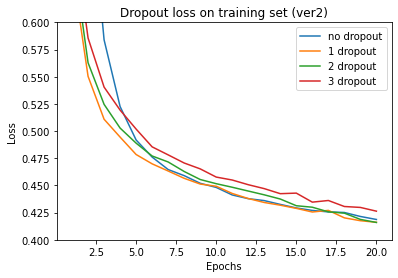

In [81]:
# Dropout effect on training loss


import matplotlib.pyplot as plt


history_dict_h1n1_ver2_onedr = history_h1n1_ver2_onedr.history
history_dict_h1n1_ver2_twodr = history_h1n1_ver2_twodr.history
history_dict_h1n1_ver2_threedr = history_h1n1_ver2_threedr.history


loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["loss"]
loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["loss"]
loss_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["loss"]

epochs = range(1, len(loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, loss_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout loss on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

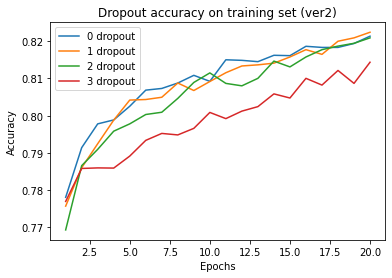

In [82]:
# Dropout effect on training accuracy


import matplotlib.pyplot as plt


acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["accuracy"]
acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["accuracy"]
acc_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["accuracy"]

epochs = range(1, len(acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, acc_values_h1n1_ver2_one, label="0 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, acc_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout accuracy on training set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.ylim([0.78, 0.85])
plt.legend()
plt.show()

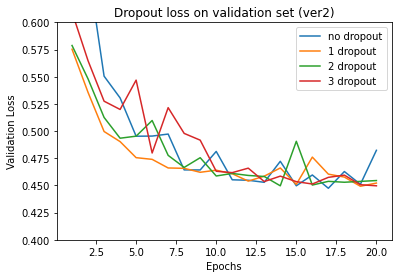

In [83]:
# Dropout effect on validation loss


import matplotlib.pyplot as plt


val_loss_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_loss"]
val_loss_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_loss"]
val_loss_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["val_loss"]


epochs = range(1, len(val_loss_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_loss_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_loss_values_h1n1_ver2_threedr, label="3 dropout")

plt.title("Dropout loss on validation set (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.ylim([0.4,0.6])
plt.legend()
plt.show()

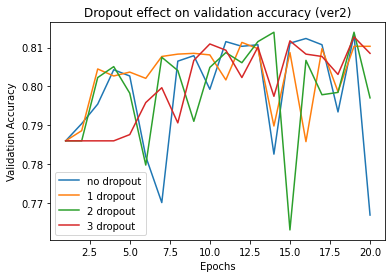

In [84]:
# Dropout effect on validation accuracy


import matplotlib.pyplot as plt



val_acc_values_h1n1_ver2_onedr = history_dict_h1n1_ver2_onedr["val_accuracy"]
val_acc_values_h1n1_ver2_twodr = history_dict_h1n1_ver2_twodr["val_accuracy"]
val_acc_values_h1n1_ver2_threedr = history_dict_h1n1_ver2_threedr["val_accuracy"]



epochs = range(1, len(val_acc_values_h1n1_ver2_onedr) + 1)


plt.plot(epochs, val_acc_values_h1n1_ver2_one, label="no dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_onedr, label="1 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_twodr, label="2 dropout")
plt.plot(epochs, val_acc_values_h1n1_ver2_threedr, label="3 dropout")


plt.title("Dropout effect on validation accuracy (ver2)")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

# things to consider

In [ ]:
## [참고]
## 모델 성능을 올리기 위한 방법 중 하나 : 배치 정규화
## 값이 활성화 함수를 통과하기 전에 가중의 변화를 줄이는 것
## https://everyday-deeplearning.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9C%BC%EB%A1%9C-%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%95%98%EA%B8%B0-%EC%8B%A0%EA%B2%BD%EB%A7%9D-%ED%95%99%EC%8A%B5%EC%9D%98-%ED%9A%A8%EC%9C%A8%EA%B3%BC-%EC%A0%95%ED%99%95%EB%8F%84-%EC%98%AC%EB%A6%AC%EA%B8%B0

## layers에서 사용할 수 없는 메소드여서 적용은 못 해봤어요 ㅠㅅㅠ


class BatchNormalization :

  def __init__(self, gamma, beta, momentum = 0.9, running_mean = None, running_var = None) :
    self.gamma = gamma
    self. beta = beta
    self.momentum = momentum
    self.input_shape = None

    # 테스트에서 사용할 평균과 분산
    self.running_mean = running_mean
    self.running_var = running_var

    # backward시 사용할 중간 데이터
    self.batch_size = None
    self.xc = None
    self.std = None
    self.dgamma = None
    self.dbeta = None

    def forward(self, x, train_flg = True) :
      self.input_shape = x.shape
      if x.ndim != 2 :
        N, C, H, W = x.shape
        x = x.reshape(N, -1)

      out = self.__forward(x, train_flg)

      return out.reshape(*self.input_shape)

    def __forward(self, x, train_flg) :
      if self.running_mean is None :
        N, D = x.shape
        self.running_mean = np.zeros(D)
        self.runnng_var = np.zeros(D)

      if train_flg :
        mu = x.mean(axis = 0)
        xc = x - mu
        var = np.mean(xc * 2, axis = 0)
        std = np.sqrt(var + 10e-7)
        xn = xc / std

        self.batch_size = x.shape[0]
        self.xc = xc
        self.xn = xn
        self.std = std
        self.running_mean = self.momentum * self.running_mean + (1 - self.momentum) * mu
        self.running_var = self.momentum * self.running_var + (1 - self.momentum) * var
      else :
        xc = x - self.running_mean
        xn = xc / ((np.sqrt(self.running_var + 10e-7)))

      out = self.gamma * xn + self. beta
      return out

    def backward(self, dout) :
      if dout.ndim != 2 :
        N, C, H, W = dout.shape
        dout = dout.reshape(N,-1)

      dx = self.__backward(dout)
      dx = dx.reshape(*self.input_shape)
      return dx

    def __backward(self, dout) :
      dbeta = dout.sum(axis = 0)
      dgamma = np.sum(self.xn * dout, axis = 0)
      dxn = self.gamma * dout
      dxc = dxn / self.std
      dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis = 0)
      dvar = 0.5 * dstd / self.std
      dxc += (2.0 / self.batch_size) * self.xc * dvar
      dmu = np.sum(dxc, axis = 0)
      dx = dxc - dmu / self. batch_size

      self.dgamma = dgamma
      self.dbeta = dbeta

      return dx


|number|layer|train loss|train accuracy|validation loss|validation accuracy|
|------|-----|----------|--------------|---------------|-------------------|
|1     |layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|2     |layers.Dense(256, activation = "relu"),</br>layers.Dense(128, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(64, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(16, activation = "relu"),</br>layers.Dense(1, activation = "sigmoid")|ㅇ|ㅇ|ㅇ|ㅇ|
|

#### seasonal 모델

In [ ]:
## age_group

train_seasonal.loc[train_seasonal['age_group'] == '18 - 34 Years', 'age_group'] = 1
train_seasonal.loc[train_seasonal['age_group'] == '35 - 44 Years', 'age_group'] = 2
train_seasonal.loc[train_seasonal['age_group'] == '45 - 54 Years', 'age_group'] = 3
train_seasonal.loc[train_seasonal['age_group'] == '55 - 64 Years', 'age_group'] = 4
train_seasonal.loc[train_seasonal['age_group'] == '65+ Years', 'age_group'] = 5


## race

train_seasonal.loc[train_seasonal['race'] == 'White', 'race'] = 1
train_seasonal.loc[train_seasonal['race'] == 'Black', 'race'] = 2
train_seasonal.loc[train_seasonal['race'] == 'Other or Multiple', 'race'] = 3
train_seasonal.loc[train_seasonal['race'] == 'Hispanic', 'race'] = 4


## sex

train_seasonal.loc[train_seasonal['sex'] == 'Female', 'sex'] = 1
train_seasonal.loc[train_seasonal['sex'] == 'Male', 'sex'] = 2


## hhs_geo_region

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_seasonal['hhs_geo_region'])

print(le.classes_)
train_seasonal['hhs_geo_region'] = le.transform(train_seasonal['hhs_geo_region'])


## census_msa

train_seasonal.loc[train_seasonal['census_msa'] == 'Non-MSA', 'census_msa'] = 1
train_seasonal.loc[train_seasonal['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 2
train_seasonal.loc[train_seasonal['census_msa'] == 'MSA, Principle City', 'census_msa'] = 3


In [ ]:
# 모델 훈련을 위해 데이터타입 변환해주기

train_seasonal['age_group'] = train_seasonal['age_group'].astype(np.int64)
train_seasonal['race'] = train_seasonal['race'].astype(np.int64)
train_seasonal['sex'] = train_seasonal['sex'].astype(np.int64)
train_seasonal['census_msa'] = train_seasonal['census_msa'].astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split

feature = train_seasonal.iloc[:,1:-1]
target = train_seasonal['seasonal_vaccine']

x_train_seasonal, x_valid_seasonal, y_train_seasonal, y_valid_seasonal = train_test_split(feature, target, test_size=0.2,shuffle=True,
                                                                                          stratify=target,  random_state=1234) 

- 모델 정의

In [ ]:
## loss: 0.5118 - accuracy: 0.7644 - val_loss: 0.5734 - val_accuracy: 0.7325
## loss: 0.5112 - accuracy: 0.7603 - val_loss: 0.5583 - val_accuracy: 0.7303

## l2 규제 적용


from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers

model_seasonal = keras.Sequential([
                               layers.Dense(256, activation="relu"),
                               layers.Dense(256, activation="relu"),
                               layers.Dense(128, activation="relu"),
                               layers.Dropout(0.5),
                               layers.Dense(128, activation="relu"),
                               layers.Dense(64, activation="relu", kernel_regularizer = regularizers.l2(0.001)),
                               layers.Dropout(0.5),
                               layers.Dense(16, activation="relu", kernel_regularizer = regularizers.l2(0.001)),
                               layers.Dense(8, activation="relu"),
                               layers.Dense(1, activation="sigmoid")
])

In [ ]:
model_seasonal.compile(optimizer="rmsprop",
                       loss="binary_crossentropy",
                       metrics=["accuracy"])    

In [ ]:
history_seasonal = model_seasonal.fit(x_train_seasonal,
                                      y_train_seasonal,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(x_valid_seasonal, y_valid_seasonal))

In [ ]:
model_seasonal.evaluate(x_valid_seasonal, y_valid_seasonal)

# 2) 코드2 ~> 인공신경망 모델

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [ ]:
training_features_data = pd.read_csv(dpath+"training_set_features.csv")
training_set_labels = pd.read_csv(dpath+"training_set_labels.csv")
test_features_data = pd.read_csv(dpath+"test_set_features.csv")

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
training_features_data=training_features_data.fillna(training_features_data.mean())

# string types -> null값을 'out-of-category'
training_features_data=training_features_data.fillna('out-of-category')

In [ ]:
training_features_data.isna().sum()

In [ ]:
# encoding categorical features (str -> float)

enc = OrdinalEncoder()

enc.fit(training_features_data)
training_features_data_arr=enc.transform(training_features_data)

col_names_list=training_features_data.columns
encoded_categorical_df=pd.DataFrame(training_features_data_arr, columns=col_names_list)

In [ ]:
# normalization(make all values bet. 0-1)

scaler = StandardScaler()
scaler.fit(encoded_categorical_df)
normalized_arr=scaler.transform(encoded_categorical_df)

normalized_df=pd.DataFrame(normalized_arr, columns=col_names_list)

In [ ]:
# check if data types are correct or not 

normalized_df.info()

In [ ]:
#check types of test dataset
test_features_data.info()

In [ ]:
# 결측치 처리

# float types -> mean 값으로 대체
test_features_data=test_features_data.fillna(test_features_data.mean())

## string types -> null값을 'out-of-category'
test_features_data=test_features_data.fillna('out-of-category')

In [ ]:
test_features_data.isna().sum()

In [ ]:
#encoding categorical features  (str -> float)
enc = OrdinalEncoder()
enc.fit(test_features_data)
test_features_data_arr=enc.transform(test_features_data)

col_names_list=test_features_data.columns
test_encoded_categorical_df=pd.DataFrame(test_features_data_arr, columns=col_names_list)

In [ ]:
#check data types
test_encoded_categorical_df.info()

In [ ]:
#normalization(bet. 0-1)

#using minmax scaler(look up)
test_normalized_arr=scaler.transform(test_encoded_categorical_df)
test_normalized_df=pd.DataFrame(test_normalized_arr, columns=col_names_list)

In [ ]:
# split df to X and Y
y = training_set_labels.loc[:, 'seasonal_vaccine'].values
X = normalized_df

In [ ]:
# 80: training set, 20: test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

# 5 fold CV
cv = StratifiedShuffleSplit(n_splits=5, random_state = 42)

In [ ]:
# display test scores and return result string and indexes of false samples
def display_test_scores(test, pred):
    str_out = ""
    str_out += ("TEST SCORES\n")
    str_out += ("\n")

    #print AUC score
    auc = roc_auc_score(test, pred)
    str_out += ("AUC: {:.4f}\n".format(auc))
    str_out += ("\n")
    
    false_indexes = np.where(test != pred)
    return str_out, false_indexes

In [ ]:
# NN with 1 layer
nn_1 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='relu', max_iter=1000, batch_size=2048)
nn_1.fit(X, y)

# prediction results
y_pred = nn_1.predict(test_normalized_df)

In [ ]:
# NN with 1 layer
nn_2 = MLPRegressor(tol=1e-5, hidden_layer_sizes=10, random_state=0, solver='adam', activation='logistic', max_iter=1000, batch_size=512)
nn_2.fit(X, y)

# prediction results
y_pred_2 = nn_2.predict(test_normalized_df)

In [ ]:
np.sum(np.logical_or(np.array(y_pred_2) > 1, np.array(y_pred_2) < 0), axis=0)
y_pred_2 = 1/(1+np.exp(-y_pred_2))

In [ ]:
df_pred_seasonal_vaccine=pd.DataFrame(y_pred_2, columns=['seasonal_vaccine'])
df_pred_seasonal_vaccine["respondent_id"] = df_pred_seasonal_vaccine.index

df_pred_seasonal_vaccine=df_pred_seasonal_vaccine[['respondent_id', 'seasonal_vaccine']]

df_pred_seasonal_vaccine.to_csv('df_seasonal_nn_log.csv', columns=['respondent_id', 'seasonal_vaccine'], 
                            index=False, sep=',')

In [ ]:
df_pred_seasonal_vaccine.head()

In [ ]:
df_pred_h1n1 = pd.read_csv(dpath+"df_h1n1_nn_log_son.csv",
                    sep=',')

df_pred_h1n1.head()

In [ ]:
df_final = df_pred_h1n1.merge(df_pred_seasonal_vaccine, on="respondent_id", how = 'inner')

df_final['respondent_id'] = df_final['respondent_id'].astype(int) + 26707

In [ ]:
df_final.to_csv('df_nn_log.csv', columns=['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine' ], 
                            index=False, sep=',')

In [ ]:
df_final.head()

### 예측하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
test_h1n1 = pd.read_csv(dpath+"test_ver1_h1n1.csv")
test_seasonal = pd.read_csv(dpath+"test_ver1_seasonal.csv")

#### h1n1 예측하기

In [ ]:
## h1n1 인코딩하기

## age_group

test_h1n1.loc[test_h1n1['age_group'] == '18 - 34 Years', 'age_group'] = 1
test_h1n1.loc[test_h1n1['age_group'] == '35 - 44 Years', 'age_group'] = 2
test_h1n1.loc[test_h1n1['age_group'] == '45 - 54 Years', 'age_group'] = 3
test_h1n1.loc[test_h1n1['age_group'] == '55 - 64 Years', 'age_group'] = 4
test_h1n1.loc[test_h1n1['age_group'] == '65+ Years', 'age_group'] = 5


## race

test_h1n1.loc[test_h1n1['race'] == 'White', 'race'] = 1
test_h1n1.loc[test_h1n1['race'] == 'Black', 'race'] = 2
test_h1n1.loc[test_h1n1['race'] == 'Other or Multiple', 'race'] = 3
test_h1n1.loc[test_h1n1['race'] == 'Hispanic', 'race'] = 4


## sex

test_h1n1.loc[test_h1n1['sex'] == 'Female', 'sex'] = 1
test_h1n1.loc[test_h1n1['sex'] == 'Male', 'sex'] = 2


## hhs_geo_region

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(test_h1n1['hhs_geo_region'])

print(le.classes_)
test_h1n1['hhs_geo_region'] = le.transform(test_h1n1['hhs_geo_region'])


## census_msa

test_h1n1.loc[test_h1n1['census_msa'] == 'Non-MSA', 'census_msa'] = 1
test_h1n1.loc[test_h1n1['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 2
test_h1n1.loc[test_h1n1['census_msa'] == 'MSA, Principle City', 'census_msa'] = 3


In [ ]:
# 모델 훈련을 위해 데이터타입 변환해주기

test_h1n1['age_group'] = test_h1n1['age_group'].astype(np.int64)
test_h1n1['race'] = test_h1n1['race'].astype(np.int64)
test_h1n1['sex'] = test_h1n1['sex'].astype(np.int64)
test_h1n1['census_msa'] = test_h1n1['census_msa'].astype(np.int64)

In [ ]:
test_h1n1.head()

In [ ]:
test_h1n1 = test_h1n1.drop(['respondent_id'], axis = 1)
test_h1n1.head()

In [ ]:
pred_h1n1 = model_h1n1.predict(test_h1n1)

In [ ]:
pred_h1n1

In [ ]:
test_features['h1n1_vaccine'] = pred_h1n1

#### seasonal 예측하기

In [ ]:
## seasonal 인코딩하기

## age_group

test_seasonal.loc[test_seasonal['age_group'] == '18 - 34 Years', 'age_group'] = 1
test_seasonal.loc[test_seasonal['age_group'] == '35 - 44 Years', 'age_group'] = 2
test_seasonal.loc[test_seasonal['age_group'] == '45 - 54 Years', 'age_group'] = 3
test_seasonal.loc[test_seasonal['age_group'] == '55 - 64 Years', 'age_group'] = 4
test_seasonal.loc[test_seasonal['age_group'] == '65+ Years', 'age_group'] = 5


## race

test_seasonal.loc[test_seasonal['race'] == 'White', 'race'] = 1
test_seasonal.loc[test_seasonal['race'] == 'Black', 'race'] = 2
test_seasonal.loc[test_seasonal['race'] == 'Other or Multiple', 'race'] = 3
test_seasonal.loc[test_seasonal['race'] == 'Hispanic', 'race'] = 4


## sex

test_seasonal.loc[test_seasonal['sex'] == 'Female', 'sex'] = 1
test_seasonal.loc[test_seasonal['sex'] == 'Male', 'sex'] = 2


## hhs_geo_region

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(test_seasonal['hhs_geo_region'])

print(le.classes_)
test_seasonal['hhs_geo_region'] = le.transform(test_seasonal['hhs_geo_region'])


## census_msa

test_seasonal.loc[test_seasonal['census_msa'] == 'Non-MSA', 'census_msa'] = 1
test_seasonal.loc[test_seasonal['census_msa'] == 'MSA, Not Principle  City', 'census_msa'] = 2
test_seasonal.loc[test_seasonal['census_msa'] == 'MSA, Principle City', 'census_msa'] = 3


In [ ]:
# 모델 훈련을 위해 데이터타입 변환해주기

test_seasonal['age_group'] = test_seasonal['age_group'].astype(np.int64)
test_seasonal['race'] = test_seasonal['race'].astype(np.int64)
test_seasonal['sex'] = test_seasonal['sex'].astype(np.int64)
test_seasonal['census_msa'] = test_seasonal['census_msa'].astype(np.int64)

In [ ]:
test_seasonal.info()

In [ ]:
test_seasonal = test_seasonal.drop(['respondent_id'], axis = 1)
test_seasonal.head()

In [ ]:
pred_seasonal = model_seasonal.predict(test_seasonal)

In [ ]:
pred_seasonal

In [ ]:
test_features['seasonal_vaccine'] = pred_seasonal

In [ ]:
test_features.head()

#### 제출 파일 만들기

In [ ]:
submission = test_features[['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine']]

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv', index=False)

## 셀 실행 후 왼쪽 파일 모양 클릭하고 'submission.csv' 파일을 다운받으면 됨.